In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
import json
import pandas as pd

In [2]:
#將檔案import進來
with open("MovieInfo2018_2.json","r",encoding="utf-8") as f:
    data = json.loads(f.read())
print(data[5]['Plot'])
print(len(data))

Merricat, Constance and their Uncle Julian live in isolation after experiencing a family tragedy six years earlier. When cousin Charles arrives to steal the family fortune, he also threatens a dark secret they've been hiding.
6871


In [3]:
#建立DF
c = ('Name','Genre','Plot')
train_df = pd.DataFrame(columns=c)

In [4]:
#將資料匯入train_df
for i in range(len(data)):
    t1 = []
    try:
        title = data[i]['Title']
        genre = data[i]['Genre']
        plot = data[i]['Plot']
    except KeyError:
        continue
    if title not in list(train_df['Name']):
            if plot != 'N/A' and genre != 'N/A':
                t1.append(title)
                t1.append(genre)
                t1.append(plot)
                s = pd.Series(t1,index=c)
                train_df = train_df.append(s,ignore_index=True)
print(train_df)

                                              Name  \
0                                    The Professor   
1                                   The Perfection   
2                                          Aquaman   
3                Spider-Man: Into the Spider-Verse   
4                                            Greta   
5               We Have Always Lived in the Castle   
6                                Bohemian Rhapsody   
7                                         Suspiria   
8                                         The Mule   
9                                       Green Book   
10                                    The Predator   
11                               Crazy Rich Asians   
12                   Mission: Impossible - Fallout   
13                                  A Star Is Born   
14                                       Smallfoot   
15                                          Shadow   
16                                       High Life   
17                          

In [5]:
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Big data\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.
[nltk_data] Downloading package punkt to C:\Users\Big
[nltk_data]     data\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [33]:
import pandas as pd
from IPython.display import display
pd.options.display.max_colwidth= 1000
pd.options.display.max_columns = None
display(train_df)

,Name,Genre,Plot
0,The Professor,"Comedy, Drama",A college professor lives his life with reckless abandon after being diagnosed with a terminal illness.
1,The Perfection,"Drama, Horror, Thriller","When troubled musical prodigy Charlotte (Allison Williams) seeks out Elizabeth (Logan Browning), the new star pupil of her former school, the encounter sends both musicians down a sinister path with shocking consequences."
2,Aquaman,"Action, Adventure, Fantasy, Sci-Fi","Arthur Curry, the human-born heir to the underwater kingdom of Atlantis, goes on a quest to prevent a war between the worlds of ocean and land."
3,Spider-Man: Into the Spider-Verse,"Animation, Action, Adventure, Family, Sci-Fi","Teen Miles Morales becomes Spider-Man of his reality, crossing his path with five counterparts from other dimensions to stop a threat for all realities."
4,Greta,"Drama, Mystery, Thriller",A young woman befriends a lonely widow who's harboring a dark and deadly agenda toward her.
5,We Have Always Lived in the Castle,"Drama, Mystery, Thriller","Merricat, Constance and their Uncle Julian live in isolation after experiencing a family tragedy six years earlier. When cousin Charles arrives to steal the family fortune, he also threatens a dark secret they've been hiding."
6,Bohemian Rhapsody,"Biography, Drama, Music","The story of the legendary rock band Queen and lead singer Freddie Mercury, leading up to their famous performance at Live Aid (1985)."
7,Suspiria,"Fantasy, Horror, Mystery, Thriller","A darkness swirls at the center of a world-renowned dance company, one that will engulf the artistic director, an ambitious young dancer, and a grieving psychotherapist. Some will succumb to the nightmare. Others will finally wake up."
8,The Mule,"Crime, Drama, Thriller",A 90-year-old horticulturist and Korean War veteran turns drug mule for a Mexican cartel.
9,Green Book,"Biography, Comedy, Drama, Music",A working-class Italian-American bouncer becomes the driver of an African-American classical pianist on a tour of venues through the 1960s American South.


In [6]:
#斷詞
import jieba
from nltk.tokenize import word_tokenize
#標註句子中關係
from nltk.chunk import ne_chunk
#標註詞性
from nltk.tag import pos_tag
#解剖樹
from nltk.tree import Tree
import re
def textcut(s):
    return " ".join(word_tokenize(s))
def removePunctuation(text):
    text = re.sub(r'\W+',' ',text)
    return text.strip().lower()
#s1 = train_df['Plot'][1]
#s2 = removePunctuation(s1)
#s3 = word_tokenize(s2)
#s3
x_train = train_df['Plot'].apply(removePunctuation).apply(textcut)
x_train

0       a college professor lives his life with reckle...
1       when troubled musical prodigy charlotte alliso...
2       arthur curry the human born heir to the underw...
3       teen miles morales becomes spider man of his r...
4       a young woman befriends a lonely widow who s h...
5       merricat constance and their uncle julian live...
6       the story of the legendary rock band queen and...
7       a darkness swirls at the center of a world ren...
8       a 90 year old horticulturist and korean war ve...
9       a working class italian american bouncer becom...
10      when a young boy accidentally triggers the uni...
11      this contemporary romantic comedy based on a g...
12      ethan hunt and his imf team along with some fa...
13      a musician helps a young singer find fame as a...
14      a yeti is convinced that the elusive creatures...
15          life and intrigue in an ancient chinese court
16      a father and his daughter struggle to survive ...
17      on the

In [29]:
#CountVectorzier combine TF-IDF
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer()
tfidf = TfidfTransformer()
s = vec.fit_transform(x_train)
s1 = tfidf.fit_transform(s)
print(s1)
print(s[1])

  (0, 11306)	0.23503053836641427
  (0, 10215)	0.37048901268866224
  (0, 8339)	0.3505904119725699
  (0, 7995)	0.3024552474761544
  (0, 6053)	0.20784206061542207
  (0, 5991)	0.1545250723671646
  (0, 5006)	0.3255211398709699
  (0, 4775)	0.10772513175669882
  (0, 2912)	0.3306918112564777
  (0, 2119)	0.23925252608024894
  (0, 1184)	0.23072981855751612
  (0, 393)	0.15811569620244426
  (0, 191)	0.40450589529491615
  (1, 11306)	0.0728759298338293
  (1, 11271)	0.22975509038583636
  (1, 11222)	0.08833468446252773
  (1, 10571)	0.18077347689658083
  (1, 10261)	0.08081497752632368
  (1, 9706)	0.17522470489571837
  (1, 9384)	0.19162851772191258
  (1, 9286)	0.20186870960301467
  (1, 9110)	0.21272375042834643
  (1, 9076)	0.17522470489571837
  (1, 8994)	0.1333529228932932
  (1, 8110)	0.2508503230922702
  :	:
  (2793, 9241)	0.10625906185614985
  (2793, 8264)	0.21143059829878744
  (2793, 7871)	0.2586242554136287
  (2793, 7498)	0.18484480904156056
  (2793, 7124)	0.13121913943701682
  (2793, 6726)	0.197567

In [26]:
#獲取詞袋模型中的所有詞語  
word = vec.get_feature_names()
#將tf-idf矩陣抽取出來，元素w[i][j]表示j詞在i類文字中的tf-idf權重
weight = s1.toarray()
print(weight)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [19]:
print ('Start Kmeans:')
from sklearn.cluster import KMeans
clf = KMeans(n_clusters=20)
s = clf.fit(weight)
print (s)
#20箇中心點
print(clf.cluster_centers_)
#每個樣本所屬的簇
print(clf.labels_)
i = 1
while i <= len(clf.labels_):
    print (i, clf.labels_[i-1])
    i = i+1
#用來評估簇的個數是否合適，距離越小說明簇分的越好，選取臨界點的簇個數
print(clf.inertia_)

Start Kmeans:
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=20, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)
[[-2.71050543e-19 -2.71050543e-20  4.06575815e-20 ...  2.71050543e-20
  -1.08420217e-19  0.00000000e+00]
 [-1.62630326e-18  5.28548559e-19 -5.55653613e-19 ... -3.79470760e-19
   5.42101086e-19 -8.13151629e-19]
 [-1.62630326e-18  5.55653613e-19 -5.69206141e-19 ... -3.93023288e-19
   5.42101086e-19  9.90587625e-04]
 ...
 [ 1.47404789e-03 -1.08420217e-19 -3.38813179e-19 ...  1.89735380e-19
   4.06575815e-19 -2.71050543e-20]
 [-8.13151629e-19 -9.48676901e-20 -3.38813179e-19 ...  1.76182853e-19
   4.06575815e-19 -2.71050543e-20]
 [-1.68051337e-18  5.96311195e-19 -5.69206141e-19 ... -4.20128342e-19
   1.48189481e-03 -8.26704157e-19]]
[ 1 19 19 ... 19 12 16]
1 1
2 19
3 19
4 1
5 2
6 17
7 5
8 12
9 15
10 4
11 19
12 6
13 1
14 10
15 13
16 4
17 1
18 19
19 18
20 2
21 1
22 17
23 9
24 4
25 2
26 19

1271 1
1272 9
1273 13
1274 4
1275 15
1276 2
1277 2
1278 1
1279 14
1280 16
1281 2
1282 4
1283 17
1284 1
1285 15
1286 12
1287 10
1288 16
1289 10
1290 19
1291 3
1292 2
1293 2
1294 16
1295 14
1296 14
1297 19
1298 11
1299 19
1300 0
1301 16
1302 11
1303 18
1304 13
1305 15
1306 10
1307 3
1308 19
1309 15
1310 10
1311 16
1312 1
1313 19
1314 18
1315 1
1316 1
1317 2
1318 1
1319 8
1320 19
1321 1
1322 2
1323 14
1324 14
1325 1
1326 16
1327 6
1328 1
1329 18
1330 16
1331 17
1332 19
1333 5
1334 2
1335 2
1336 17
1337 19
1338 0
1339 3
1340 4
1341 4
1342 8
1343 16
1344 10
1345 1
1346 1
1347 19
1348 17
1349 19
1350 16
1351 16
1352 2
1353 4
1354 19
1355 2
1356 18
1357 19
1358 2
1359 16
1360 19
1361 1
1362 2
1363 1
1364 16
1365 11
1366 16
1367 10
1368 9
1369 19
1370 19
1371 1
1372 19
1373 18
1374 6
1375 16
1376 2
1377 2
1378 2
1379 18
1380 7
1381 1
1382 17
1383 1
1384 8
1385 11
1386 0
1387 18
1388 3
1389 9
1390 16
1391 19
1392 17
1393 3
1394 4
1395 7
1396 16
1397 2
1398 17
1399 15
1400 18
1401 1
1402 7
1403 

2533 1
2534 2
2535 10
2536 18
2537 7
2538 2
2539 12
2540 17
2541 1
2542 9
2543 19
2544 15
2545 3
2546 18
2547 1
2548 12
2549 12
2550 19
2551 3
2552 3
2553 12
2554 9
2555 11
2556 14
2557 13
2558 1
2559 10
2560 19
2561 1
2562 18
2563 16
2564 1
2565 0
2566 1
2567 1
2568 18
2569 10
2570 4
2571 14
2572 6
2573 18
2574 7
2575 16
2576 7
2577 2
2578 3
2579 1
2580 3
2581 18
2582 4
2583 17
2584 1
2585 1
2586 1
2587 2
2588 12
2589 13
2590 8
2591 8
2592 16
2593 2
2594 7
2595 19
2596 17
2597 4
2598 16
2599 19
2600 6
2601 10
2602 19
2603 17
2604 5
2605 14
2606 9
2607 18
2608 1
2609 6
2610 3
2611 4
2612 0
2613 19
2614 4
2615 9
2616 9
2617 3
2618 19
2619 11
2620 19
2621 7
2622 17
2623 19
2624 15
2625 16
2626 3
2627 14
2628 4
2629 7
2630 15
2631 2
2632 3
2633 19
2634 16
2635 2
2636 12
2637 6
2638 16
2639 6
2640 7
2641 2
2642 19
2643 12
2644 5
2645 5
2646 2
2647 7
2648 1
2649 10
2650 4
2651 9
2652 6
2653 2
2654 19
2655 3
2656 16
2657 10
2658 17
2659 11
2660 14
2661 2
2662 12
2663 2
2664 3
2665 16
2666 17

In [21]:
#中心點
clf.cluster_centers_
#每個樣本分類
clf.labels_

array([ 1, 19, 19, ..., 19, 12, 16])

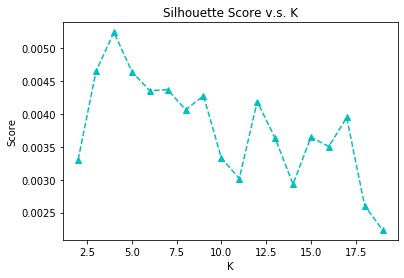

In [24]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
%matplotlib inline
xs = []
ys = []
for k in range(2,20):
    cluster = KMeans(n_clusters=k)
    cluster.fit(weight)
    s = silhouette_score(weight,cluster.labels_)
    xs.append(k)
    ys.append(s)
plt.xlabel("K")
plt.ylabel("Score")
plt.title("Silhouette Score v.s. K")
plt.plot(xs,ys,"^--c")